## **Experiment 3: Exploratory Data Analysis & Statistical Analysis**

In [1]:
!pip install "dvc[gdrive]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.8/438.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.9/374.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.

### **Load Data with DVC**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import dvc.api
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

repo_url = 'https://github.com/AshwinVK23/Zomato_delivery_time_analyser'
data_path = 'Zomato_Data.csv'
commit_hash = '2c33766'

# Open the data stream using DVC
with dvc.api.open(
    path=data_path,
    repo=repo_url,
    rev=commit_hash
) as data_stream:
    df = pd.read_csv(data_stream)

print("Dataset loaded successfully!")
print("Shape of the dataset:", df.shape)
df.head()

Dataset loaded successfully!
Shape of the dataset: (45094, 21)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance (km)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,10.28
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,6.24
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1,No,Metropolitian,21,13.79
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,9:20,...,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,2.93
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,19.40


In [6]:
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'distance (km)'],
      dtype='object')


### **Plot Class balance**

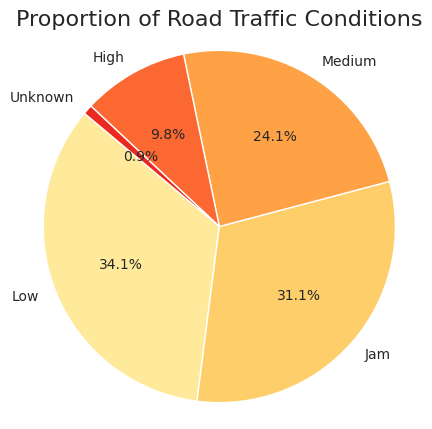

In [16]:
traffic_counts = df['Road_traffic_density'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(
    traffic_counts,
    labels=traffic_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('YlOrRd')
)
plt.title('Proportion of Road Traffic Conditions', fontsize=16)
plt.axis('equal')
plt.show()

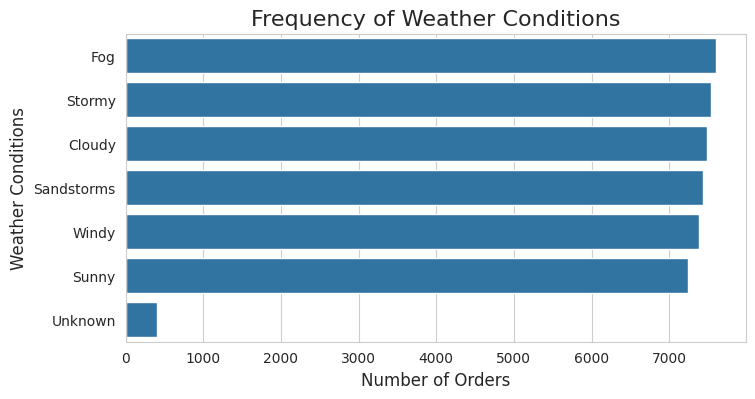

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(y='Weather_conditions', data=df, order=df['Weather_conditions'].value_counts().index)
plt.title('Frequency of Weather Conditions', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Weather Conditions', fontsize=12)
plt.show()

###**Feature frequency distribution**

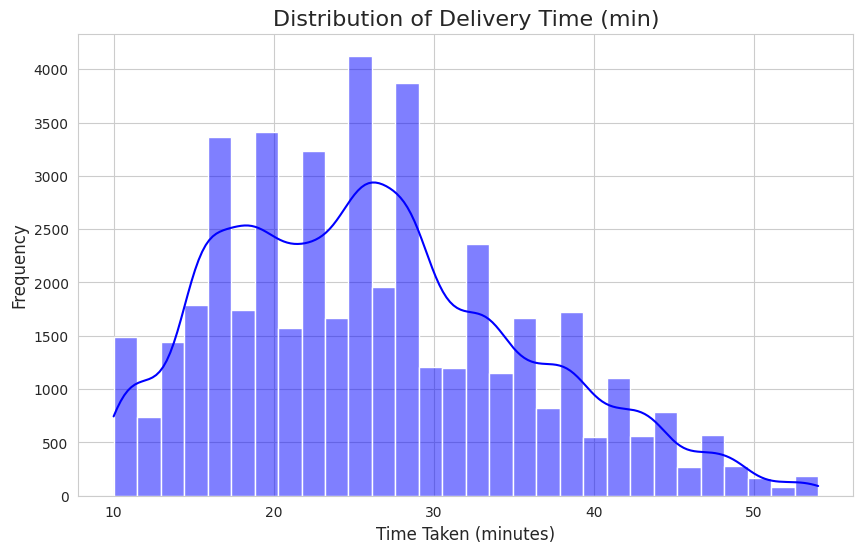

In [19]:
# Histogram for delivery time
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken (min)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Delivery Time (min)', fontsize=16)
plt.xlabel('Time Taken (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

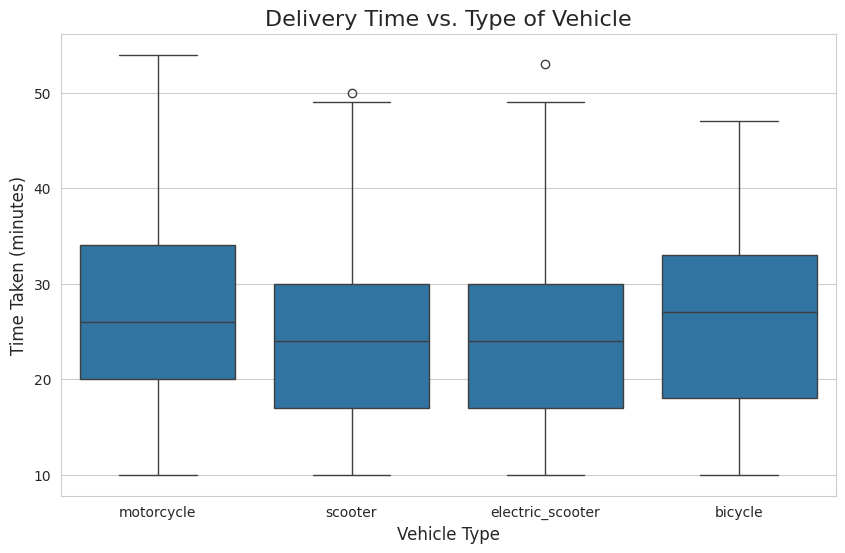

In [21]:
# Boxplot of Time Taken vs. Type of Vehicle
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_vehicle', y='Time_taken (min)', data=df)
plt.title('Delivery Time vs. Type of Vehicle', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Time Taken (minutes)', fontsize=12)
plt.show()

### **Feature correlation assessment**

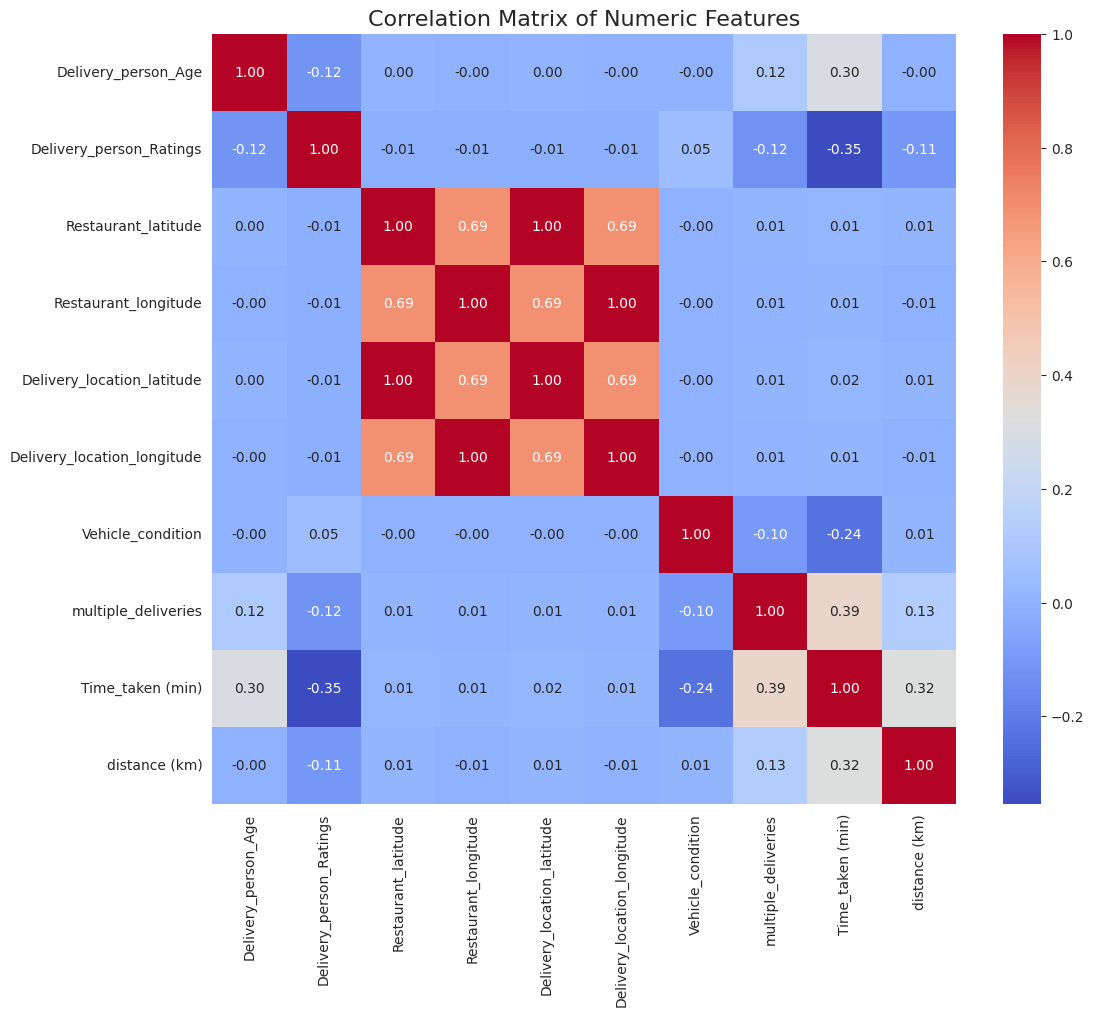

In [26]:
# The heatmap shows the relationships between all numerical features.

numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

### **Feature Distribution Analysis & Outlier Detection**

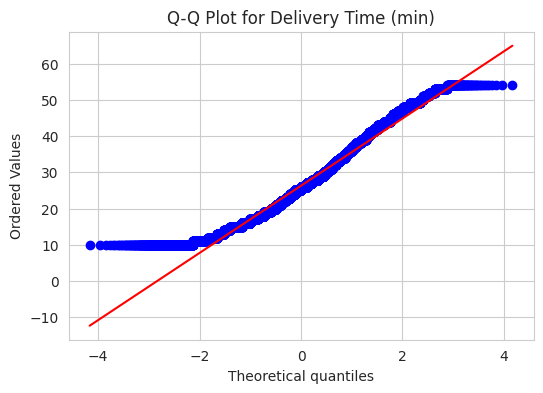

In [40]:
# Test if the Time_taken (min) feature follows a normal (Gaussian) distribution.
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
# Create the Q-Q plot against a normal distribution
stats.probplot(df['Time_taken (min)'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Delivery Time (min)')
plt.show()

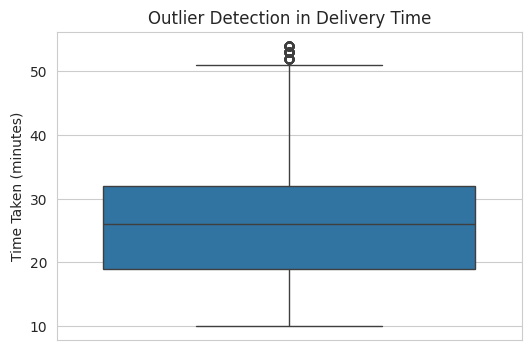

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Time_taken (min)'])
plt.title('Outlier Detection in Delivery Time')
plt.ylabel('Time Taken (minutes)')
plt.show()

### **Hypothesis testing**

Test to check if there is a significant difference in delivery time on days with "Sunny" weather vs. days with "Stormy" weather.


In [34]:
# Create the two groups for the t-test
sunny_times = df[df['Weather_conditions'] == 'Sunny']['Time_taken (min)']
stormy_times = df[df['Weather_conditions'] == 'Stormy']['Time_taken (min)']

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(sunny_times, stormy_times, equal_var=False)

print("--- T-Test: Sunny vs. Stormy Weather Delivery Times ---")
print(f"Test Statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: We reject the null hypothesis.")
    print("There is a statistically significant difference in mean delivery time between sunny and stormy days.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is no statistically significant difference in mean delivery time between sunny and stormy days.")

--- T-Test: Sunny vs. Stormy Weather Delivery Times ---
Test Statistic: -29.0362
P-value: 0.0000

Conclusion: We reject the null hypothesis.
There is a statistically significant difference in mean delivery time between sunny and stormy days.
